## We looked at how the features varies with targets (50000+)  
1. grouped related features together
2. dropped features
2. turn features into 0 and 1 values (dummies or transform) for modeling

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
import data_prep
ROOT_DIR = os.path.dirname('data/')
file_path = os.path.abspath(os.path.join(ROOT_DIR, 'census-income.csv'))
data1=data_prep.load_file(file_path)
data1.head(2)


,age,worker_class,detailed_ind_cd,detailed_occ_cd,education,wage,enrolled_last_wk,marital_status,major_ind_cd,major_occ_cd,...,birth_country_father,birth_country_mother,birth_country,citizenship,occupation,fill_inc_question_veteran_admin,veteran_benefit,weeks_worked_in_yr,year,target
0,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,0
1,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,0


In [4]:
target_trend={}
for cols in data1.columns.values[:-1]:
    if data1[cols].dtypes != np.float64:
        tmp=pd.DataFrame(data1.groupby([cols])[data1.columns.values[-1]].mean())
        target_trend[cols]=tmp

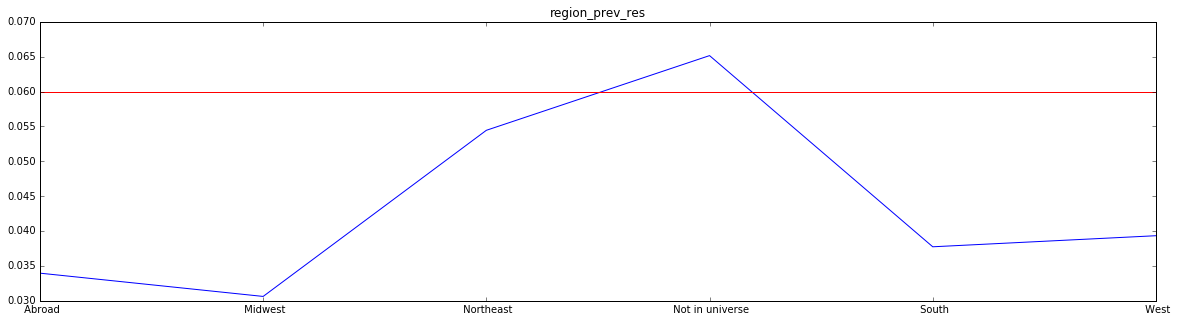

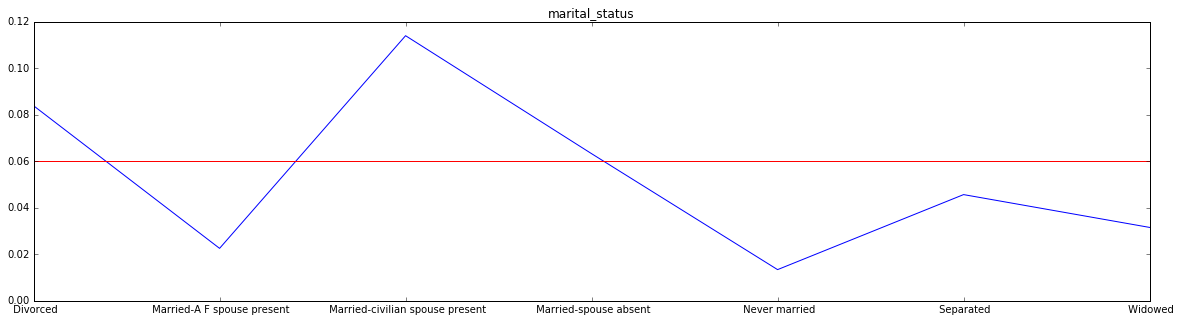

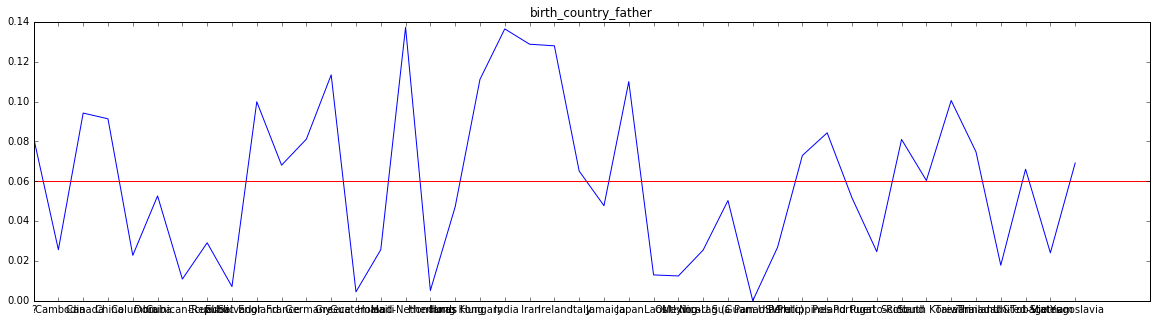

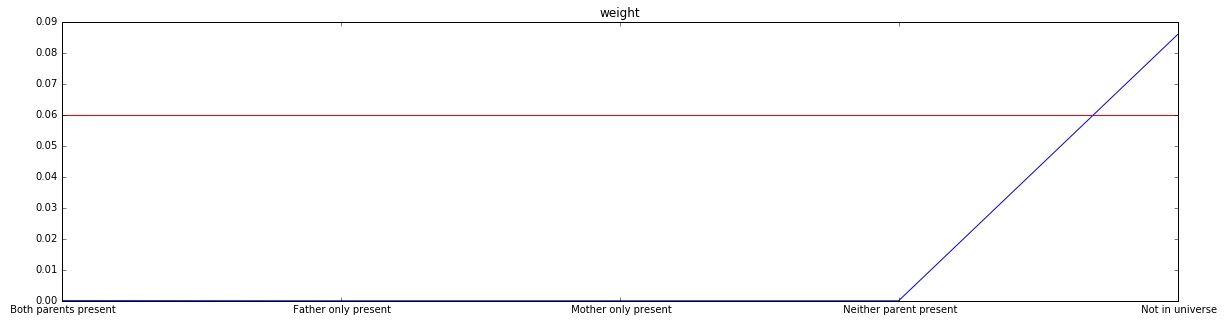

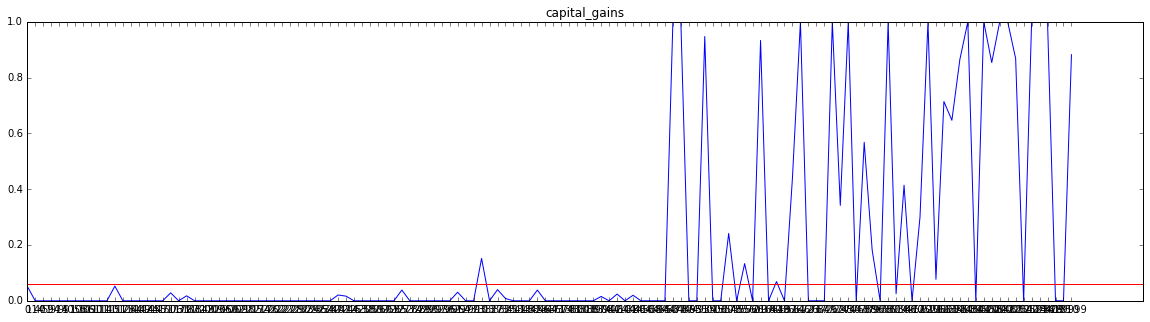

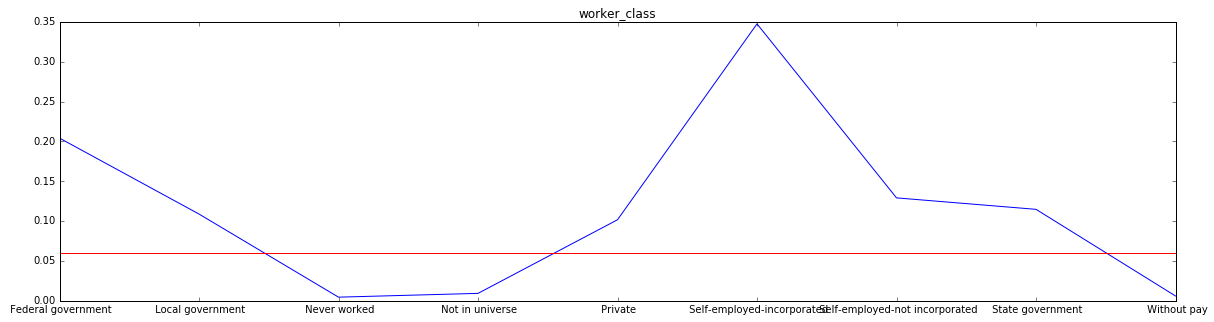

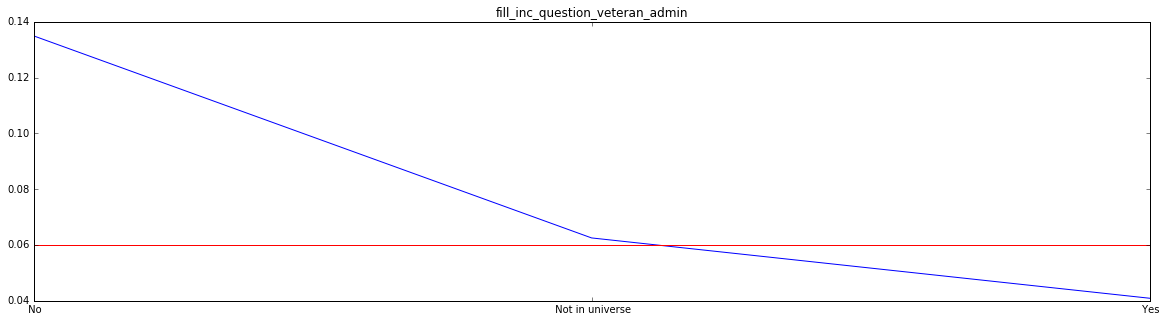

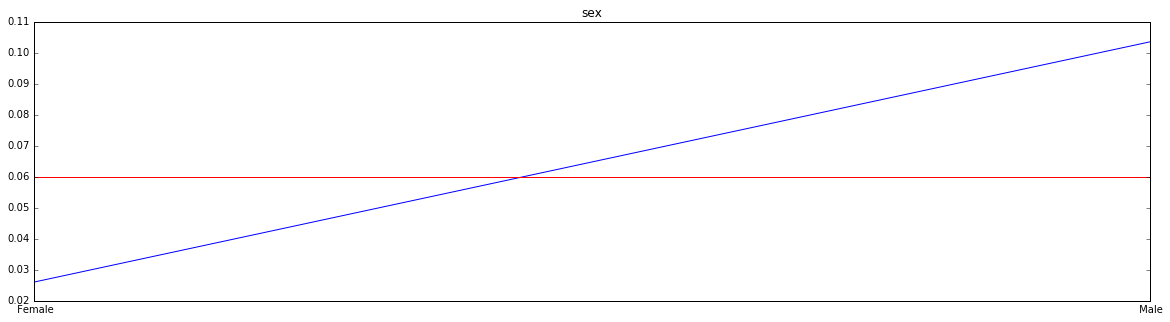

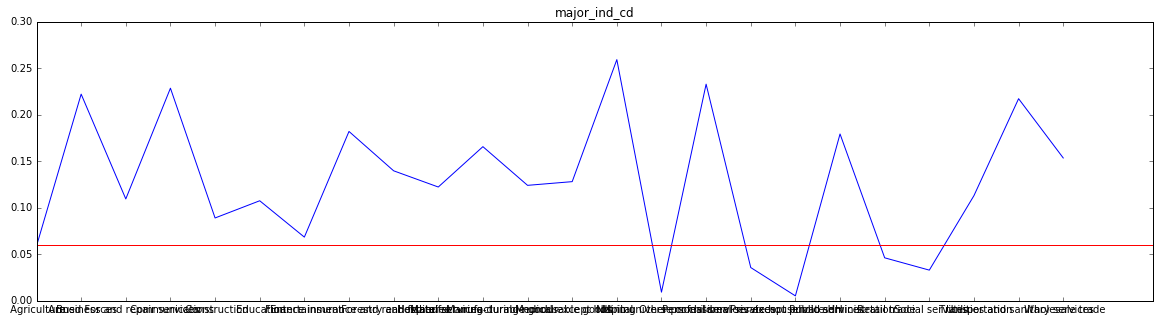

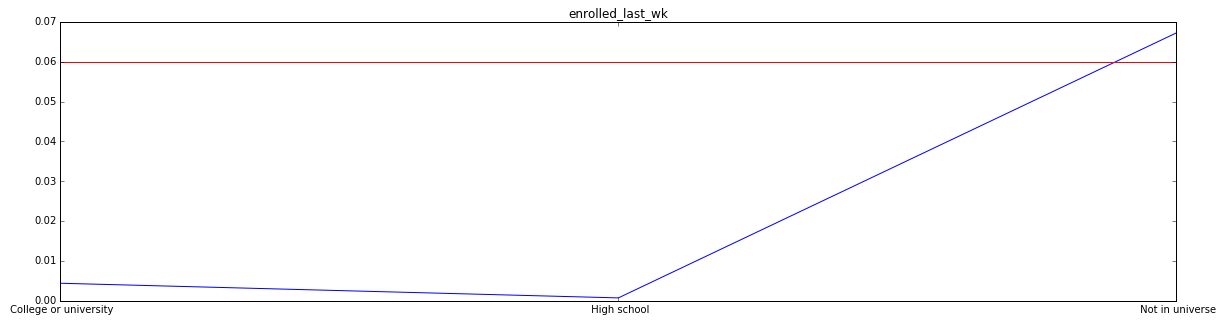

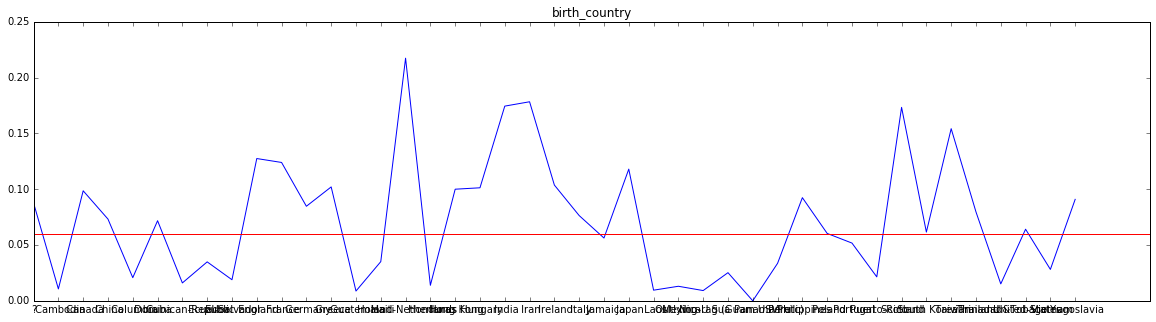

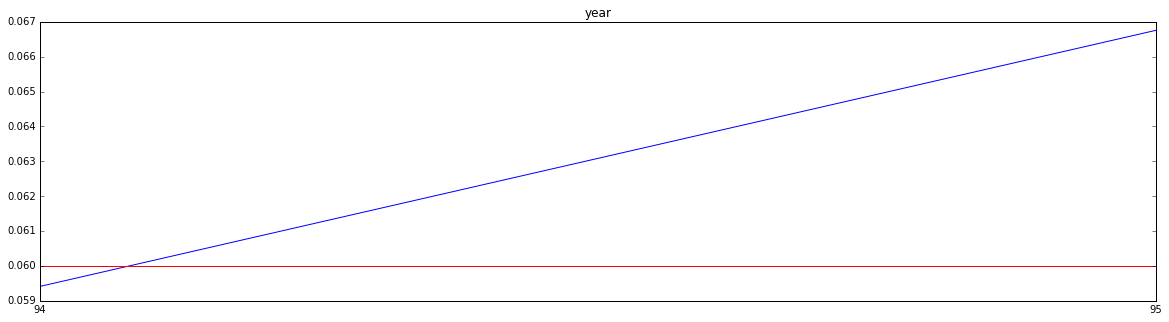

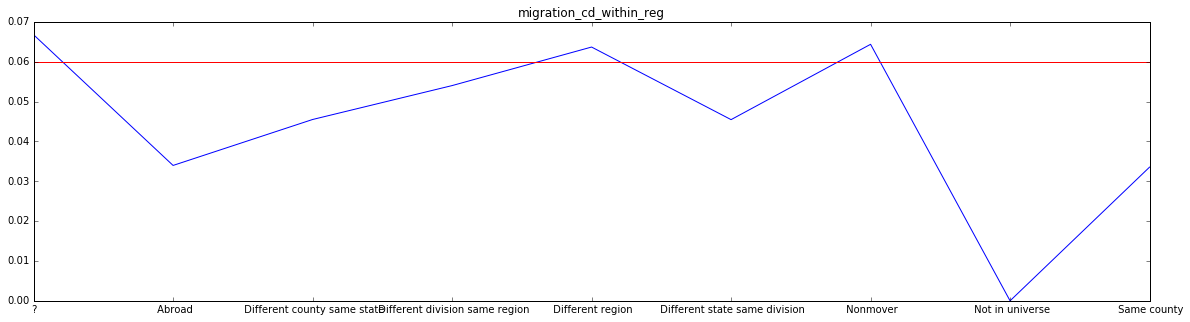

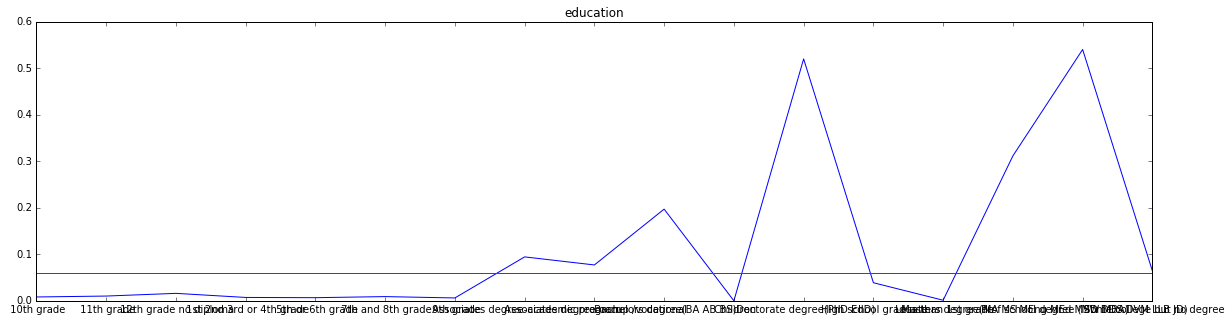

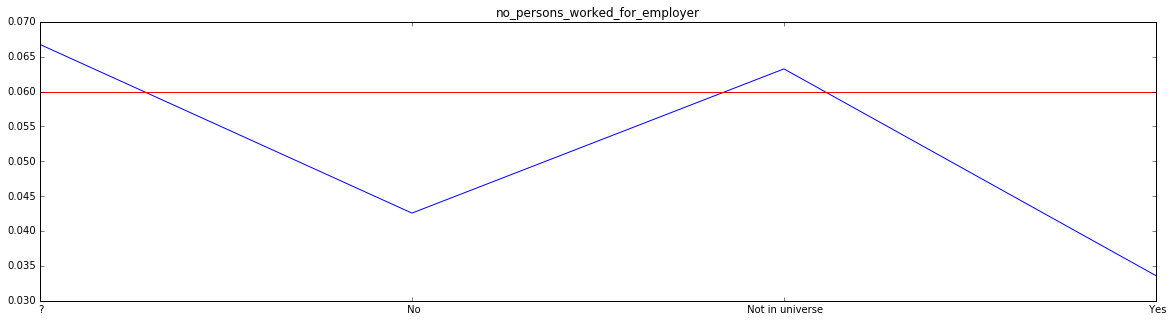

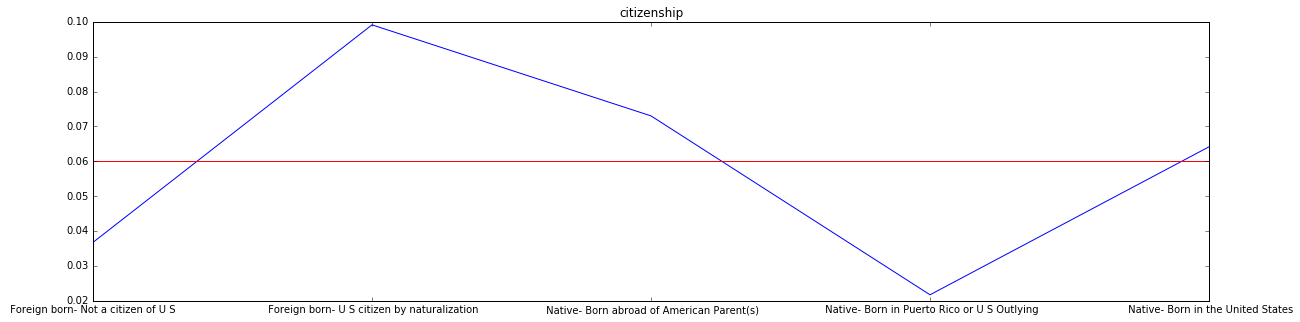

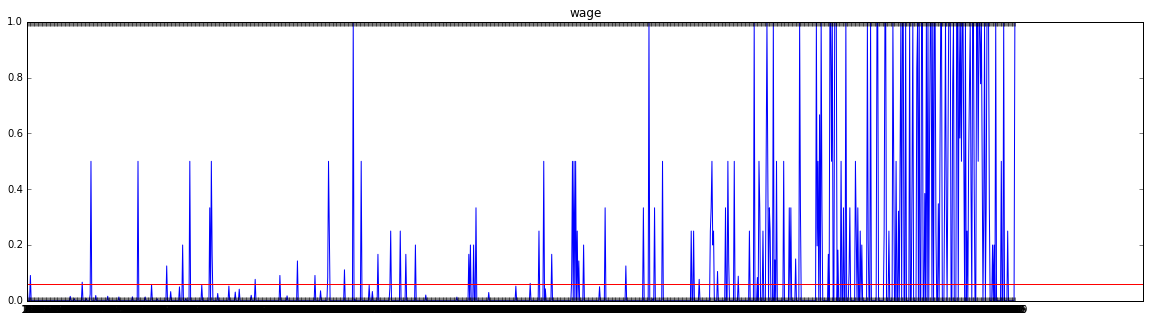

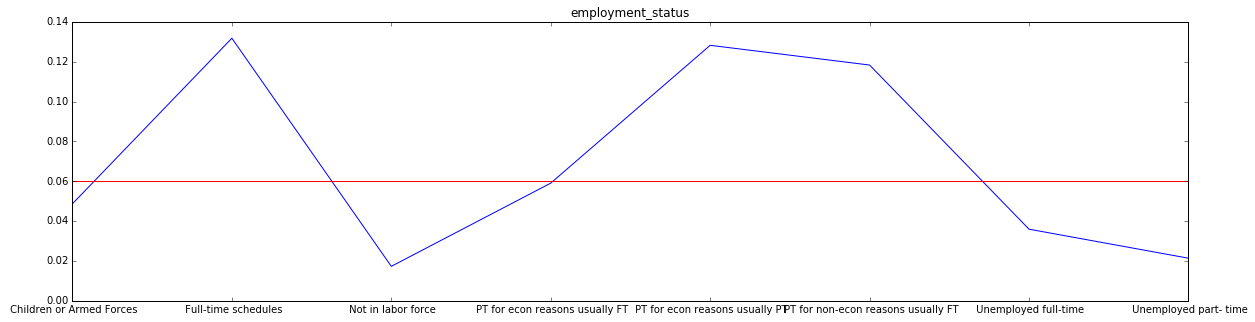

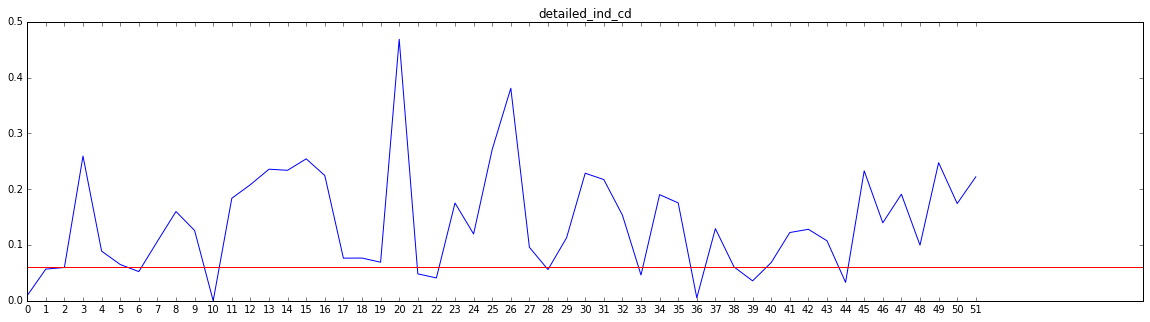

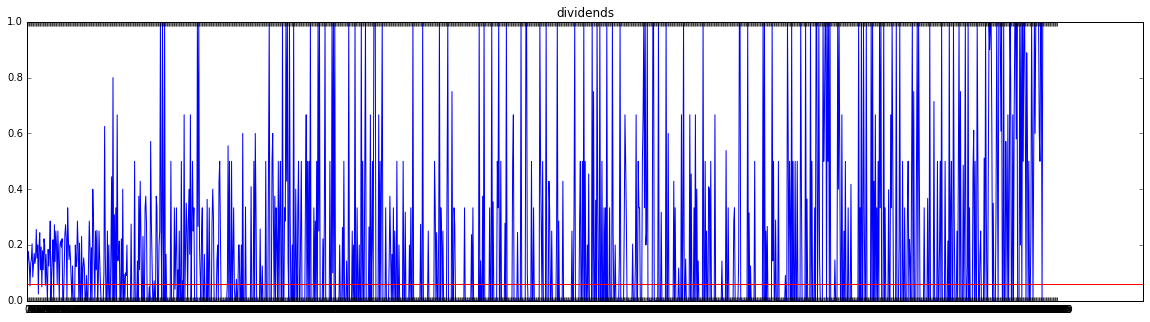

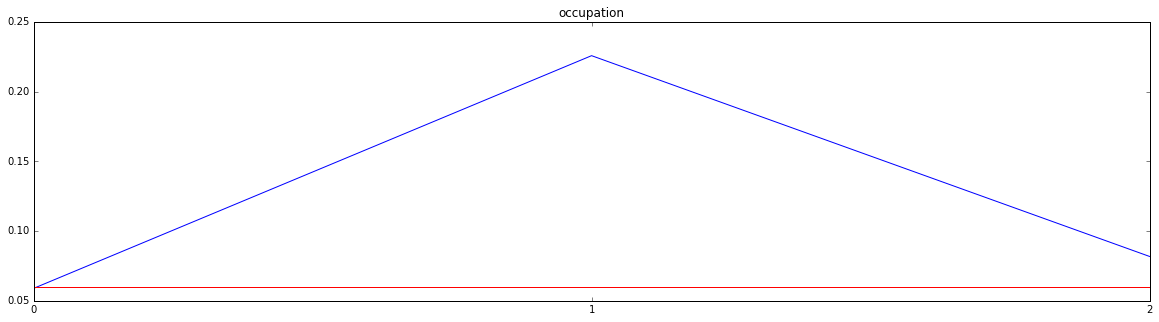

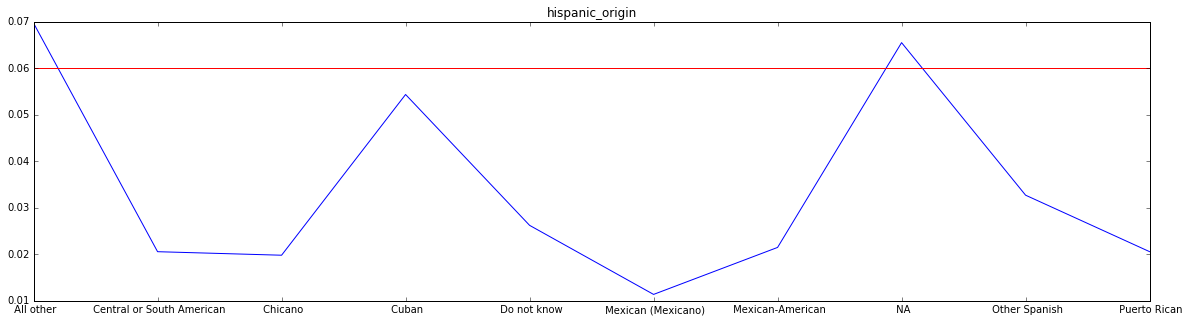

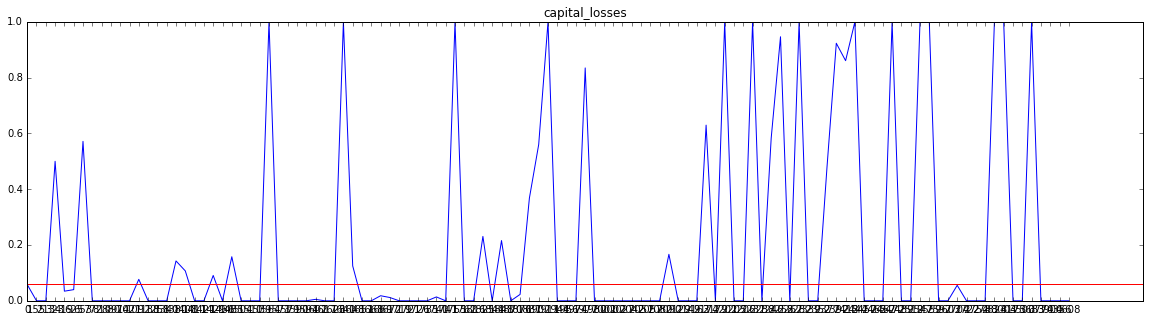

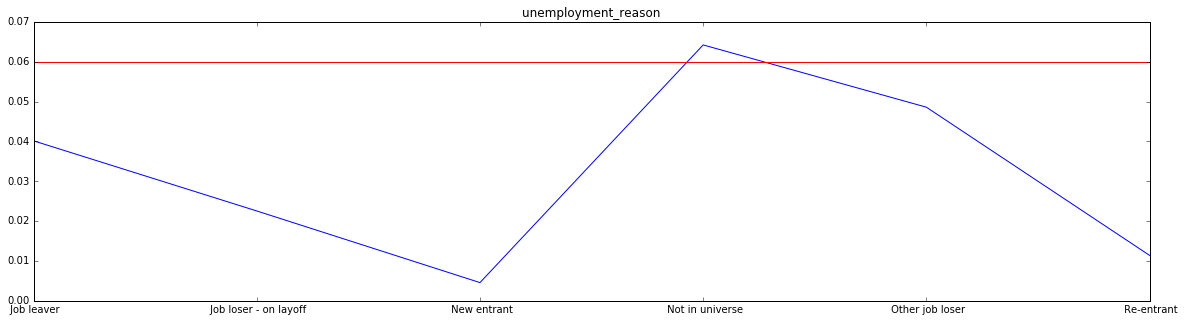

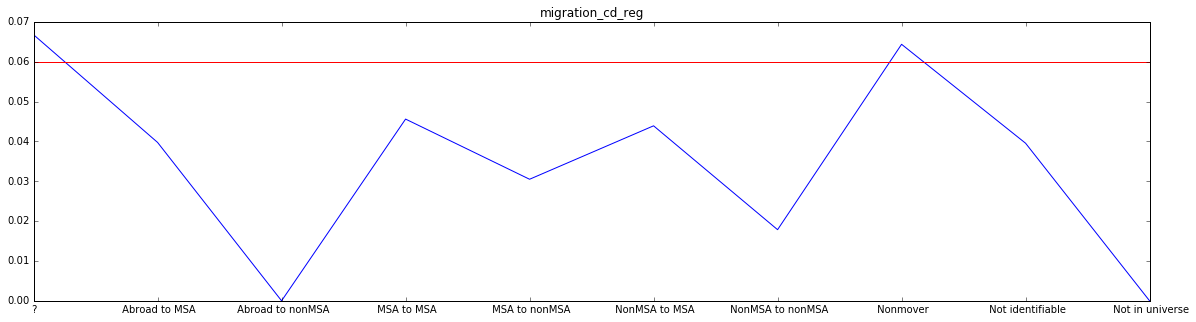

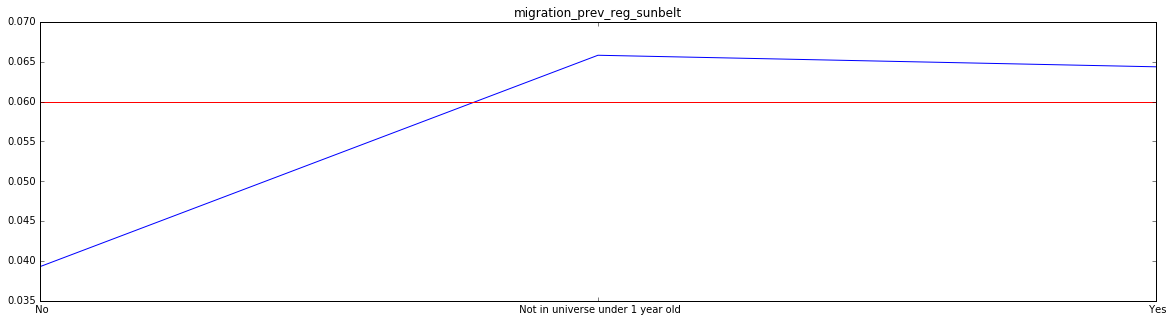

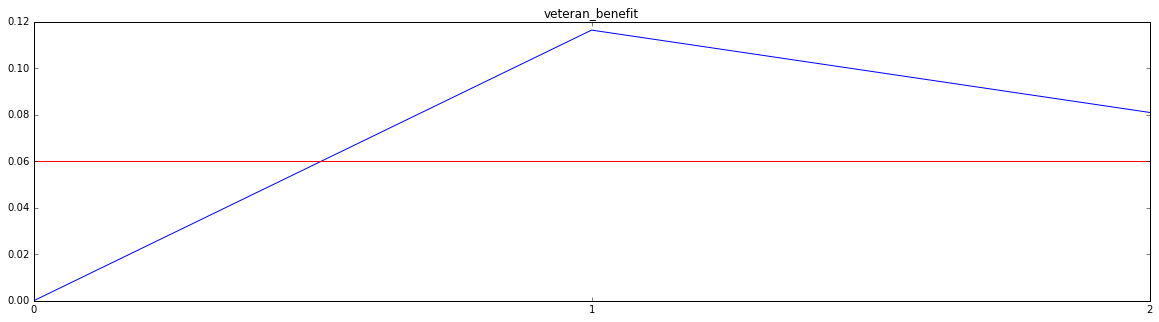

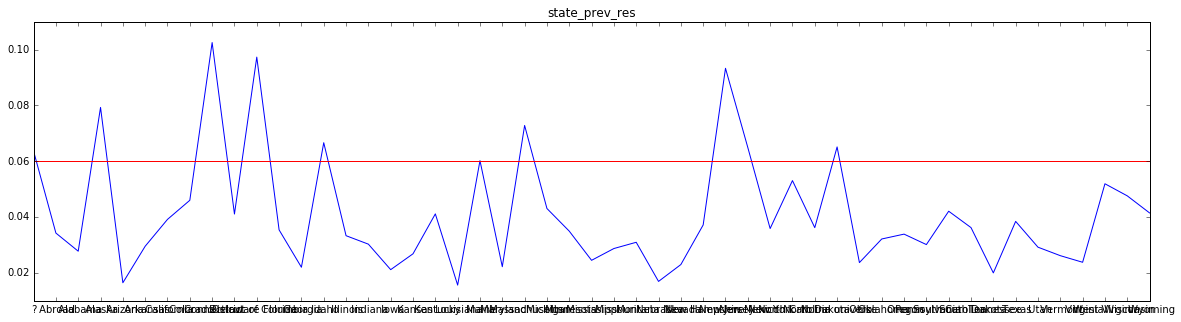

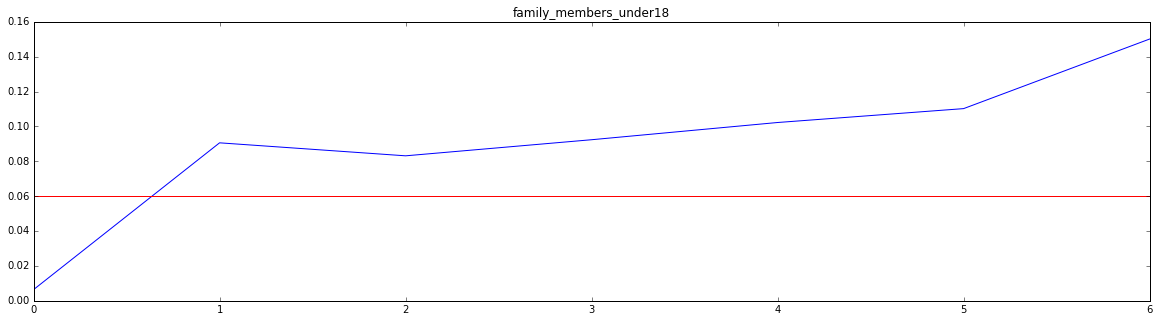

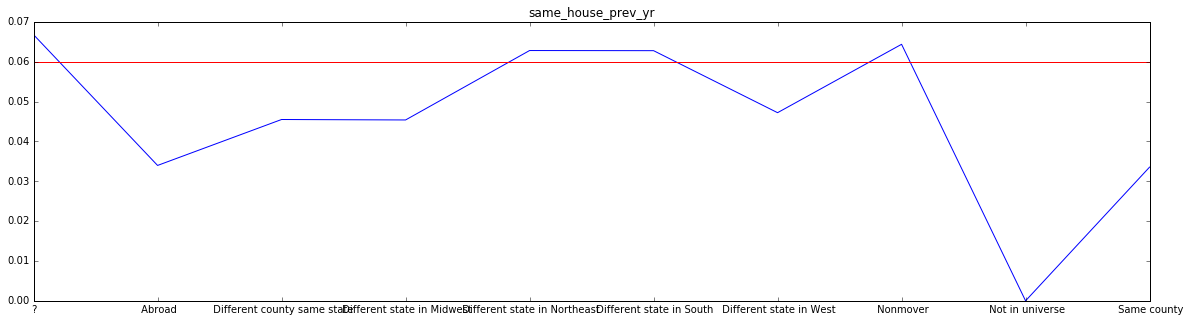

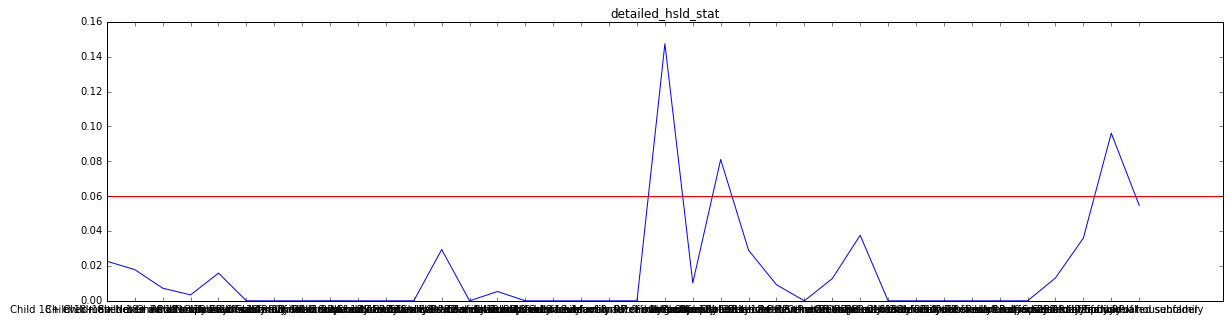

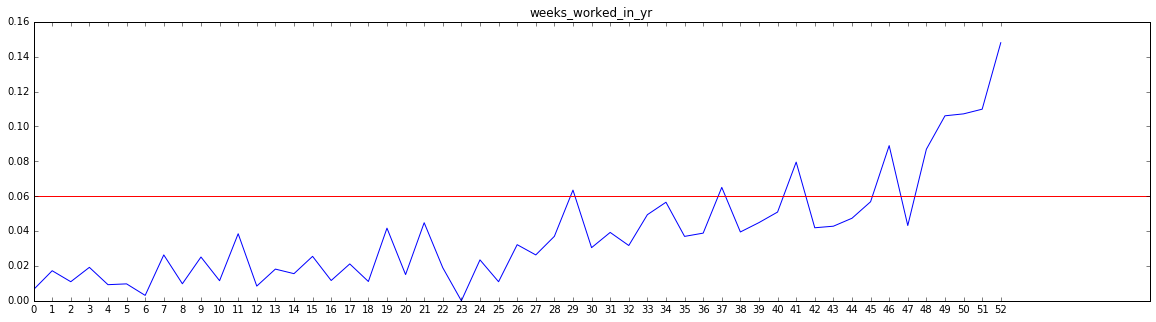

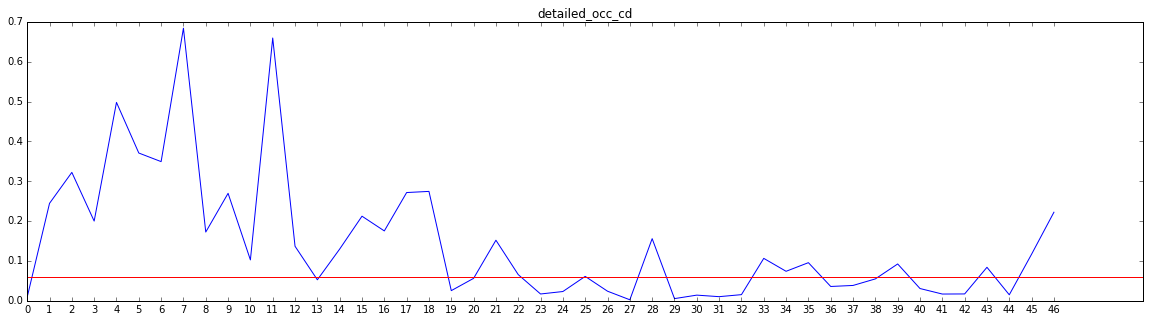

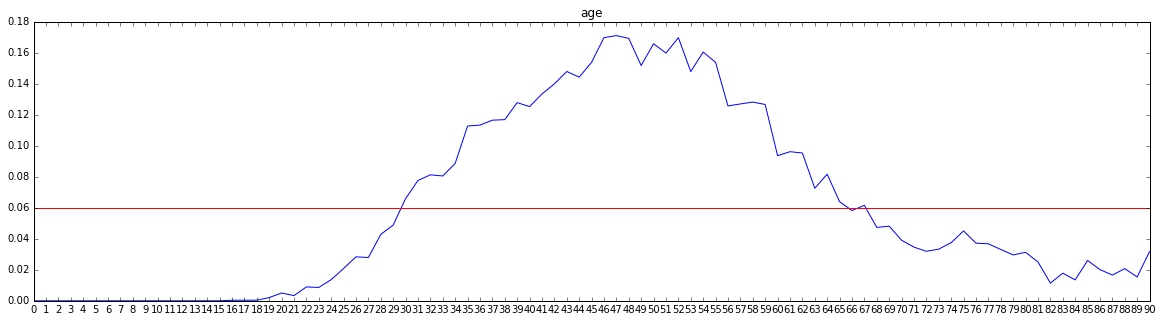

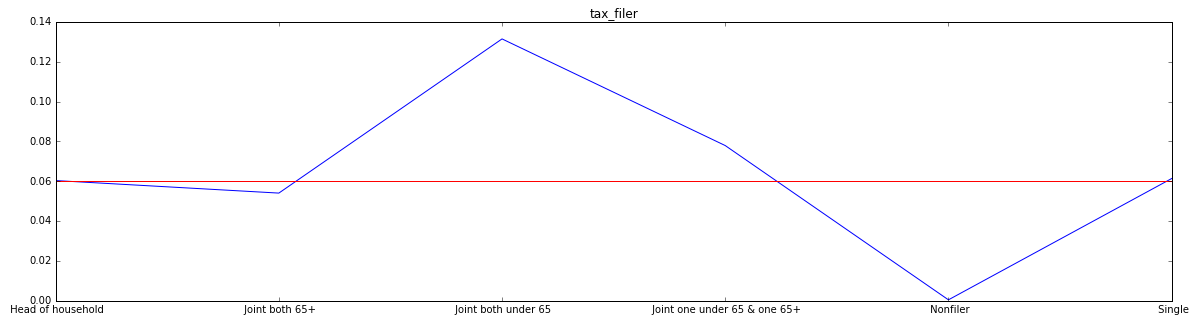

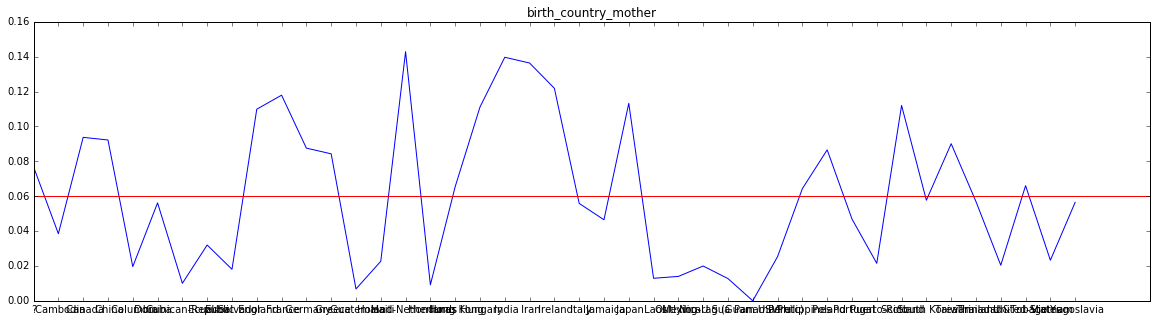

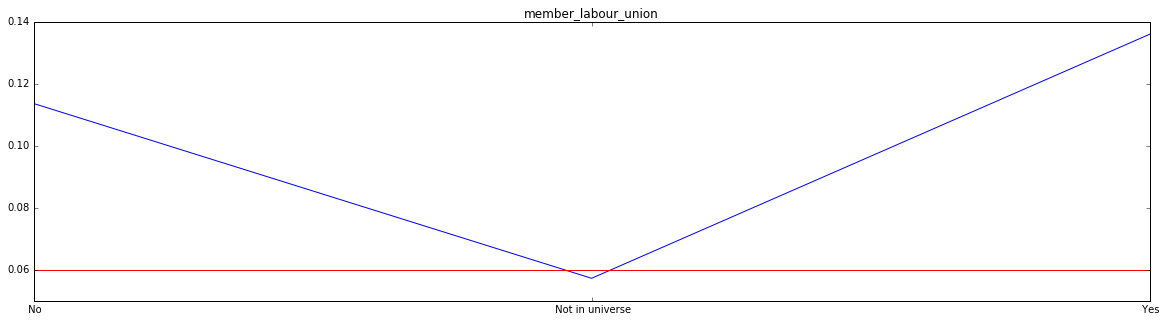

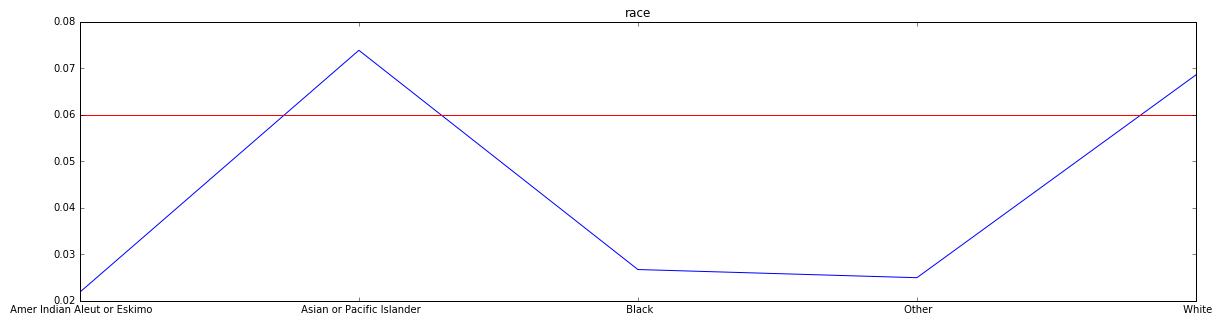

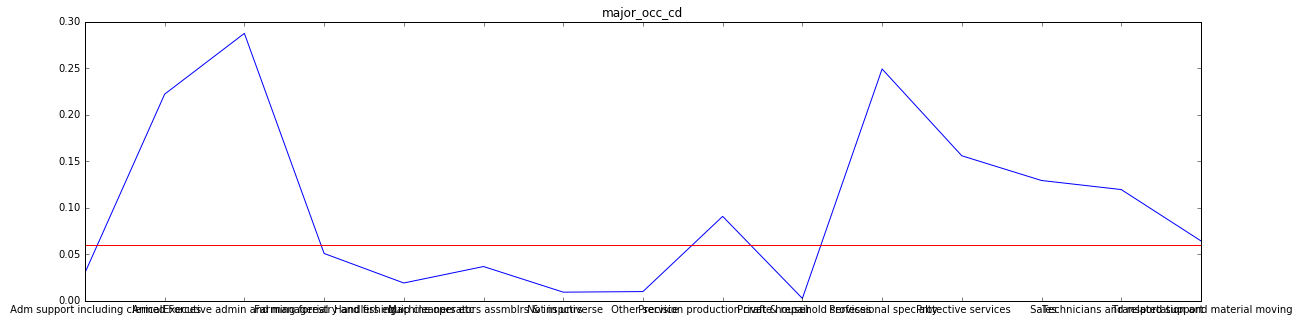

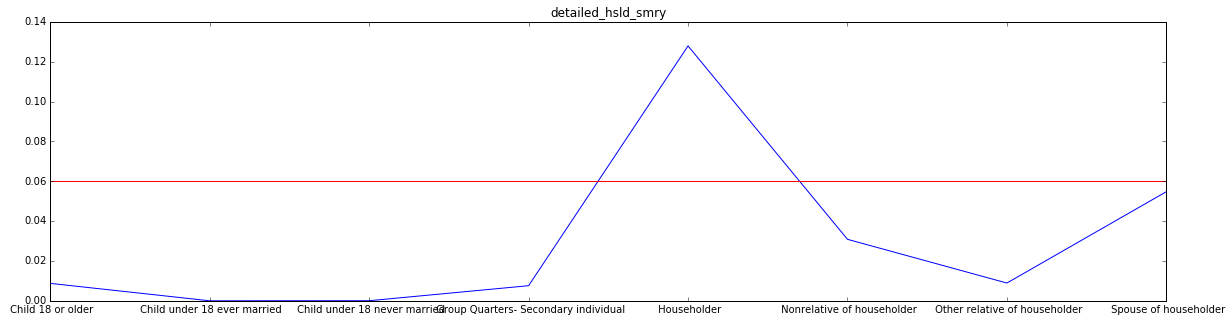

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
for cols in target_trend:
    fig=plt.figure(figsize=(20,5))
    x=range(target_trend[cols].shape[0])
    plt.plot(x,target_trend[cols]['target'])
    plt.xticks(x,target_trend[cols].index)
    plt.axhline(0.06,color='r')
    plt.title(cols)
    plt.show(fig)